## Imports

In [1]:
# imports
import os
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

## Load sample images

In [2]:
# Load the images
im1 = cv2.imread('../data/images/cropped_GX030259_frame_024532.jpg')
im2 = cv2.imread('../data/images/cropped_GX030259_frame_023749.jpg')

## Load mediapipe model

In [3]:
# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

In [4]:
def show_pose(im):
    results = pose.process(im)
    if results.pose_landmarks:

        mp_drawing = mp.solutions.drawing_utils
        image_with_landmarks = im.copy()
        mp_drawing.draw_landmarks(image_with_landmarks, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        image_with_landmarks = cv2.cvtColor(image_with_landmarks, cv2.COLOR_BGR2RGB)

        plt.figure(figsize = (10,10))
        plt.imshow(image_with_landmarks)
        plt.show()

    else:
        plt.figure(figsize = (10,10))
        plt.imshow(im)
        plt.show()

## Test on sample images

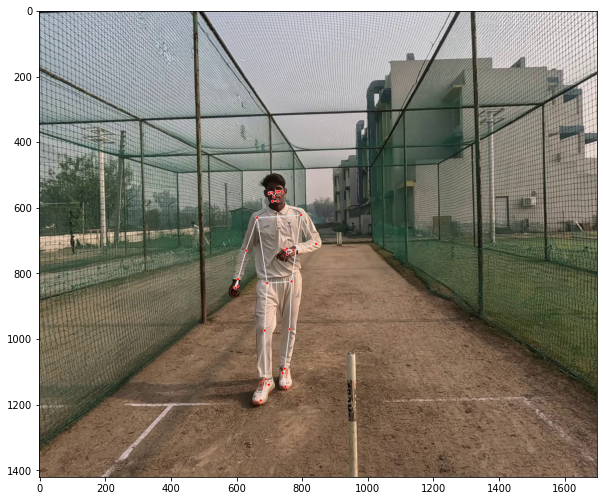

In [5]:
show_pose(im2)

## Get coordinates of each point

https://developers.google.com/mediapipe/solutions/vision/pose_landmarker

In [6]:
im = cv2.imread('../data/images/cropped_GX030259_frame_023749.jpg')
h, w, c = im.shape
landmark_temp = {}

left_toe_idx = 31
left_ankle_idx = 27
right_toe_idx = 32
right_ankle_idx = 28
left_wrist_idx = 15
right_wrist_idx = 16

results = pose.process(im)
if results.pose_landmarks:
    mp_drawing = mp.solutions.drawing_utils
    image_with_landmarks = im.copy()
    mp_drawing.draw_landmarks(image_with_landmarks, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    mark = results.pose_landmarks.landmark
    landmark_temp['LEFT_FOOT_INDEX'] = mark[left_toe_idx].x*w, mark[left_toe_idx].y*h
    landmark_temp['LEFT_ANKLE'] = mark[left_ankle_idx].x*w, mark[left_ankle_idx].y*h
    landmark_temp['RIGHT_FOOT_INDEX'] = mark[right_toe_idx].x*w, mark[right_toe_idx].y*h
    landmark_temp['RIGHT_ANKLE'] = mark[right_ankle_idx].x*w, mark[right_ankle_idx].y*h
    landmark_temp['LEFT_WRIST'] = mark[left_wrist_idx].x*w, mark[left_wrist_idx].y*h
    landmark_temp['RIGHT_WRIST'] = mark[right_wrist_idx].x*w, mark[right_wrist_idx].y*h


In [7]:
print(landmark_temp)

{'LEFT_FOOT_INDEX': (750.3067761659622, 1145.1926147937775), 'LEFT_ANKLE': (745.6266433000565, 1090.9682214260101), 'RIGHT_FOOT_INDEX': (675.0925481319427, 1187.2183012962341), 'RIGHT_ANKLE': (689.7076278924942, 1122.9816699028015), 'LEFT_WRIST': (775.8389741182327, 732.0014643669128), 'RIGHT_WRIST': (608.716493844986, 814.0992093086243)}
